In [77]:
import pandas as pd
import math
from sklearn import datasets


In [52]:
diabetes = pd.read_csv('diabetes_s.csv')

In [9]:
diabetes.shape

(770, 10)

In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               770 non-null    int64  
 1   Glucose                   770 non-null    int64  
 2   BloodPressure             770 non-null    int64  
 3   SkinThickness             770 non-null    int64  
 4   Insulin                   770 non-null    int64  
 5   DiabetesPedigreeFunction  770 non-null    float64
 6   Age                       770 non-null    int64  
 7   height_cm                 770 non-null    float64
 8   weight_g                  770 non-null    float64
 9   Outcome                   770 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 60.3 KB


In [10]:
temp = diabetes.append(diabetes)
temp.shape

(1540, 10)

In [11]:
temp.drop_duplicates(inplace=True , keep=False)


In [12]:
temp.shape


(0, 10)

In [53]:
diabetes.columns = [col.lower() for col in diabetes.columns]
diabetes.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'diabetespedigreefunction', 'age', 'height_cm', 'weight_g', 'outcome'],
      dtype='object')

In [33]:
diabetes['age'][87]
count=0
for i in range(len(diabetes['age'])):
    if i<0 or i>100:
        count+=1

In [34]:
count

669

In [54]:
diabetes.drop(columns='age')

pregnancies  glucose  bloodpressure  skinthickness  insulin  \
0              6      148             72             35        0   
1              1       85             66             29        0   
2              8      183             64              0        0   
3              1       89             66             23       94   
4              0      137             40             35      168   
..           ...      ...            ...            ...      ...   
765           10      101             76             48      180   
766            2      122             70             27        0   
767            5      121             72             23      112   
768            1      126             60              0        0   
769            1       93             70             31        0   

     diabetespedigreefunction   height_cm      weight_g  outcome  
0                       0.627  174.803824  102669.42660        1  
1                       0.351  160.562625   68575.74880        0  
2                       0.672  175.009819   71364.25736        1  
3                       0.167  167.368772   78714.57892        0  
4                       2.288  169.425535  123718.60180        1  
..                        ...         ...           ...      ...  
765                     0.171  160.725514   84989.55259        0  
766                     0.340  166.035347  101449.27000        0  
767                     0.245  158.879205   66135.61688        0  
768                     0.349  160.153364   77203.79115        1  
769                     0.315  158.778689   76640.44300        0  

[770 rows x 9 columns]

In [55]:
diabetes.rename(columns={
    'height_cm':'height_m',
    'weight_g':'weight_kg'
}, inplace=True)
diabetes.head()

pregnancies  glucose  bloodpressure  skinthickness  insulin  \
0            6      148             72             35        0   
1            1       85             66             29        0   
2            8      183             64              0        0   
3            1       89             66             23       94   
4            0      137             40             35      168   

   diabetespedigreefunction  age    height_m     weight_kg  outcome  
0                     0.627   50  174.803824  102669.42660        1  
1                     0.351   31  160.562625   68575.74880        0  
2                     0.672   32  175.009819   71364.25736        1  
3                     0.167   21  167.368772   78714.57892        0  
4                     2.288   33  169.425535  123718.60180        1

In [56]:
diabetes['height_m'] = diabetes['height_m']/100

In [57]:
diabetes['weight_kg']=diabetes['weight_kg']/1000

In [58]:
diabetes.head()

pregnancies  glucose  bloodpressure  skinthickness  insulin  \
0            6      148             72             35        0   
1            1       85             66             29        0   
2            8      183             64              0        0   
3            1       89             66             23       94   
4            0      137             40             35      168   

   diabetespedigreefunction  age  height_m   weight_kg  outcome  
0                     0.627   50  1.748038  102.669427        1  
1                     0.351   31  1.605626   68.575749        0  
2                     0.672   32  1.750098   71.364257        1  
3                     0.167   21  1.673688   78.714579        0  
4                     2.288   33  1.694255  123.718602        1

In [65]:
def calculateBMI(row):
    return row['weight_kg']//math.pow(row['height_m'],2)

In [63]:
diabetes['BMI'] = diabetes.apply(lambda row:calculateBMI(row), axis=1)

In [64]:
diabetes.head()

pregnancies  glucose  bloodpressure  skinthickness  insulin  \
0            6      148             72             35        0   
1            1       85             66             29        0   
2            8      183             64              0        0   
3            1       89             66             23       94   
4            0      137             40             35      168   

   diabetespedigreefunction  age  height_m   weight_kg  outcome   BMI  
0                     0.627   50  1.748038  102.669427        1  33.0  
1                     0.351   31  1.605626   68.575749        0  26.0  
2                     0.672   32  1.750098   71.364257        1  23.0  
3                     0.167   21  1.673688   78.714579        0  28.0  
4                     2.288   33  1.694255  123.718602        1  43.0

In [72]:
diabetes['BMI'].mean()

31.894805194805194

In [68]:
diabetes['BMI'].std()

13.003974546007552

In [69]:
diabetes['BMI'].max()

319.0

In [70]:
diabetes['BMI'].min()

0.0

In [76]:
diabetes.max(axis=0)

pregnancies                  17.000000
glucose                     199.000000
bloodpressure               122.000000
skinthickness                99.000000
insulin                     846.000000
diabetespedigreefunction      2.420000
age                         600.000000
height_m                      1.782543
weight_kg                   903.156700
outcome                       1.000000
BMI                         319.000000
dtype: float64

In [78]:
iris  = datasets.load_iris()

In [79]:
type(iris)

sklearn.utils.Bunch

In [80]:
x,y = iris.data,iris.target

In [81]:
from sklearn import tree

In [85]:
iris_tree = tree.DecisionTreeClassifier(max_depth =3)
iris_tree.fit(x,y)

DecisionTreeClassifier(max_depth=3)

[Text(125.55000000000001, 190.26, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(41.85, 27.180000000000007, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(209.25, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

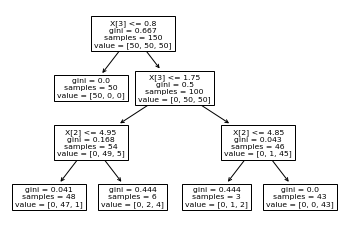

In [86]:
tree.plot_tree(iris_tree)

In [88]:
iris_tree = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth =3)
iris_tree.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(125.55000000000001, 190.26, 'X[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\nentropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

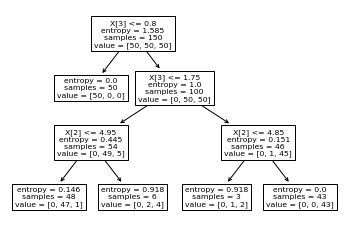

In [89]:
tree.plot_tree(iris_tree)